In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Rameshwar Agarwal\Desktop\python\assignment 10\driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [18]:
sub_driver = df.iloc[:,1:3]
sub_driver

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [5]:
from sklearn.cluster import KMeans

sse = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sub_driver)
    sse.append(kmeans.inertia_)

In [10]:
sse

[12184626.12962798,
 1316420.8509477177,
 992634.0606702471,
 719601.1096991902,
 534670.7025866128,
 372864.6216034773,
 319767.0564343118,
 276961.48247100855,
 252728.66648281936]

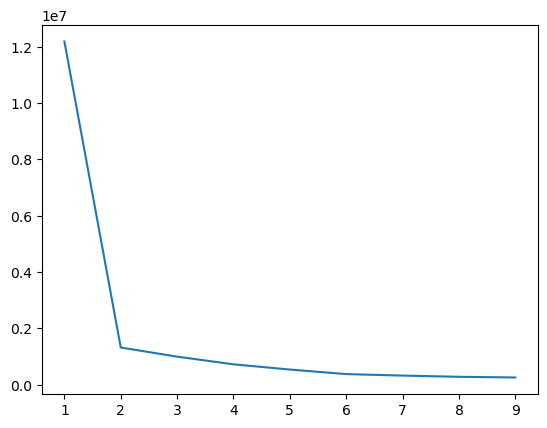

In [12]:
plt.plot([1,2,3,4,5,6,7,8,9], sse)

In [30]:
kmeans1 = KMeans(n_clusters=4)

kmeans1.fit(sub_driver)

kmeans1.cluster_centers_

kmeans1.labels_

sub_driver.columns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


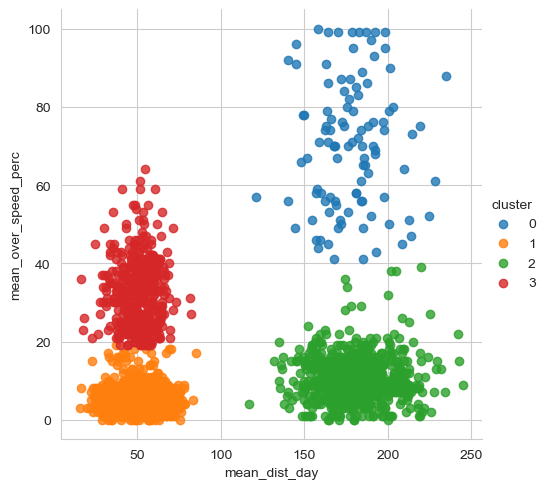

In [35]:
sub_driver['cluster'] = kmeans1.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=sub_driver, hue='cluster', aspect=1, fit_reg=False)

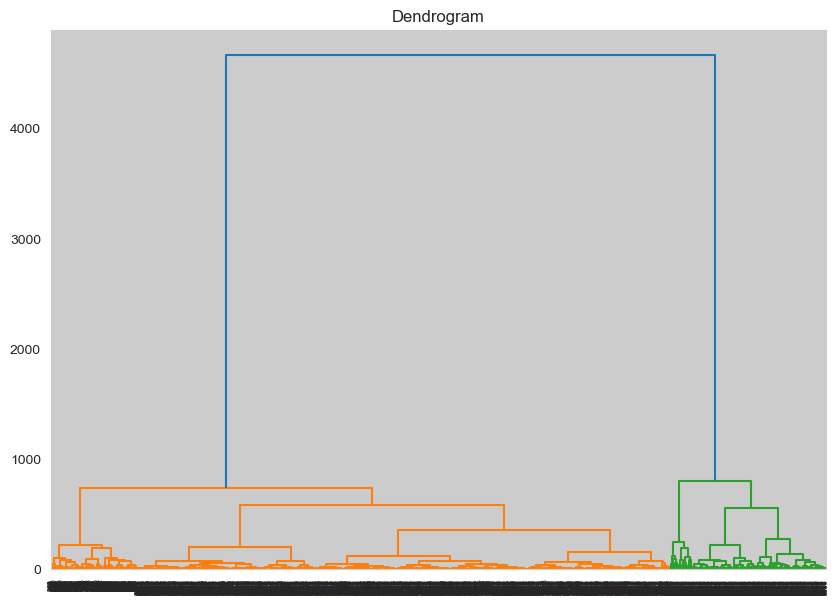

In [38]:
import scipy.cluster.hierarchy as sch 
plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(sub_driver, method = 'ward'))
plt.title('Dendrogram')
plt.show()